In [1]:
import pandas as pd

In [2]:
notas = "./ratings.csv"
filmes = "./movies.csv"
dfFilmes = pd.read_csv(filmes)
dfNotas = pd.read_csv(notas)

In [3]:
dfFilmes.isnull().sum()
dfNotas.isnull().sum()
dfFilmes.isna().sum()
dfNotas.isna().sum() #verificando se existe valor NA ou NULL nas tabelas

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [4]:
dfNotas.describe() #POdemos com o describe pegar alguns valores importantes como a média, a mediana e a contagem.

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [5]:
dfFilmes.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [6]:
dfGenero = dfFilmes.join(dfFilmes["genres"].str.get_dummies()).drop("genres", axis = 1)

In [7]:
mediaGenero = dfGenero.mean(numeric_only=None)

/tmp/ipykernel_9315/3755772257.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mediaGenero = dfGenero.mean(numeric_only=None)


In [8]:
media = dfNotas.rating.mean().round(1) #Essa é a média de todas as notas na ordem de acordo com o movieId
# E foram arredondadas em apenas 1 casa decimal 

In [9]:
arredondadas = dfNotas.rating.round(1)#aqui pegamos todas as notas arredondadas

In [10]:
dfNotas.set_index("userId", inplace=True)
dfFilmes.set_index("movieId", inplace=True)

In [11]:
#Pra descobrirmos o melhor filme vamos começar fazendo um filtro que junta todas os filmes com nota == 5
filtro = dfNotas.rating == 5
soma = dfNotas.loc[filtro] #aplicando o loc com o filtro montamos um novo dt como todos os filmes de nota 5

In [12]:
#agora com o auxilio de um grouby na coluna "moviesId", colocando um sort no fim, podemos vez de forma decrescente qual é o filme que mais recebeu notas 5, nesse caso é o filme com o id 318 que é o filme Shawshank Redemption
melhoresFilmes = soma.groupby("movieId").rating.count().dropna().sort_values(ascending=False).head(5)

In [13]:
#Aplicamos novamente um filtro para pegar todas as notas 0.5
filtro2 = dfNotas.rating == 0.5
meno = dfNotas.loc[filtro2] #Atribuimos a um novo df todos os filmes com nota 0.5

In [14]:
#Novamente fazemos um groupby com movieId pra descobrir qual filme recebeu mais notas 0.5, que é o filme 2683 - Austin Powers: The Spy Who Shagged Me (1999)
pioresFilmes = meno.groupby("movieId").rating.count().dropna().sort_values(ascending=False).head(5)

In [15]:
#Agora vamos fazer o ranking de usuários que mais votaram, com o código abaixo podemos ver que o usuário 414 foi o que mais realizou votações, com 2698 votos
votos = dfNotas.groupby("userId").rating.count().dropna().sort_values(ascending=False).head(5)

In [16]:
# A partir daqui vou começar a montar os gráficos para os dados que eu filtrei

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/bartholoseu/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


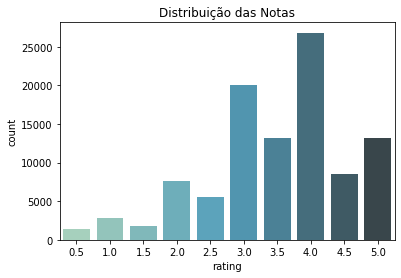

In [18]:
palette = sns.color_palette("GnBu_d", 10)# Definimos uma paleta pra fazer um degradê e melhorar o gráfico
sns.countplot(arredondadas, palette=palette) #Aqui temos um representação mais organizada usando a biblioteca seaborn
plt.title("Distribuição das Notas");

In [19]:
melhores = pd.merge(dfFilmes, melhoresFilmes, how = 'inner', on = 'movieId').head()

In [20]:
melhores.columns = ["Título","Gênero","Melhores Notas"]
melhores.sort_values("Melhores Notas",ascending=False) # Representação dos 5 melhores filmes

,Título,Gênero,Melhores Notas
movieId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,153
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,123
356,Forrest Gump (1994),Comedy|Drama|Romance|War,116
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,109
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,104


<AxesSubplot:xlabel='Melhores Notas', ylabel='Título'>

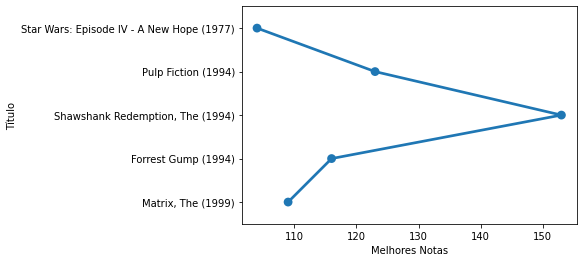

In [21]:
sns.pointplot(x = "Melhores Notas", y = "Título", data = melhores) # Os 5 melhores filmes representados em gráfico

In [22]:
piores = pd.merge(dfFilmes, pioresFilmes, how = 'inner', on = 'movieId').head()

In [23]:
piores.columns = ["Título","Gênero","Piores Notas"]
piores.sort_values("Piores Notas",ascending=False) #Aqui temos os 5 piores filmes

,Título,Gênero,Piores Notas
movieId,,,
2683,Austin Powers: The Spy Who Shagged Me (1999),Action|Adventure|Comedy,7
1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,5
1732,"Big Lebowski, The (1998)",Comedy|Crime,5
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
2617,"Mummy, The (1999)",Action|Adventure|Comedy|Fantasy|Horror|Thriller,5


<AxesSubplot:xlabel='Piores Notas', ylabel='Título'>

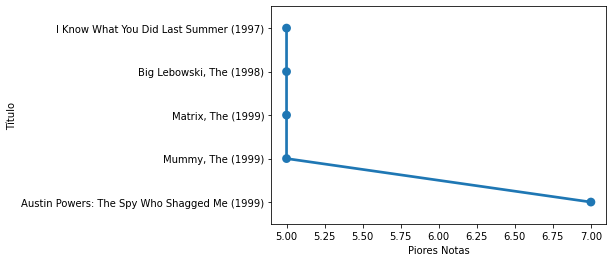

In [24]:
sns.pointplot(x = "Piores Notas", y = "Título", data = piores)  # Os 5 piores filmes representados em gráfico